In [1]:
!date
!pwd

Втр Май 23 17:35:37 MSK 2017
/home/sphere/github/Sphere/separate


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np

In [2]:
datum = pd.read_csv('01Events.dat', index_col=0)
print(datum.shape)
datum[:5]

(575, 25)


,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,delay,H,UTC,...,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
EID,,,,,,,,,,,,,,,,,,,,,
10675,E,10,688,242,241,242,241,360,307.8,2013-03-09 18:16:20,...,3.562,9.965,31.0,0.204204,0.766965,1.802776,34.0,32.0,2.497441,2.845292
10677,E,29,1336,241,240,243,240,112,307.8,2013-03-09 18:18:12,...,53.317,501.569,51.0,0.486947,1.157275,1.519109,56.0,13.0,5.654537,27.097272
10679,D,76,7143,242,250,252,242,13,307.6,2013-03-09 18:18:25,...,600.431,2820.565,9.0,1.193805,2.939874,1.058301,14.0,25.0,0.201590,1.311606
10683,E,22,505,236,243,472,236,181,305.9,2013-03-09 18:32:54,...,30.208,663.708,2.0,1.146681,1.483240,1.927248,5.0,7.0,0.928107,18.222066
10685,E,15,6588,242,242,242,242,1160,308.1,2013-03-09 18:52:14,...,33.247,1022.189,81.0,0.329867,0.681385,1.568929,84.0,39.0,4.959357,47.367534


In [3]:
print(datum.columns)

Index(['Type', 'Dt', 'Atotal', 'TG5time', 'TL2time', 'TL3time', 'TRIGGER',
       'delay', 'H', 'UTC', 'EAS', 'SNRatio_s', 'SNRatio_n', 'AbsSignal_s',
       'AbsSignal_n', 'TotalNoise_s', 'TotalNoise_n', 'NNear3', 'Theta',
       'dt2_s', 'dt2_n', 'ng_s', 'ng_n', 'Crit1', 'Crit2'],
      dtype='object')


In [4]:
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s',       
       'TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n', 'Crit1', 'Crit2',
       'Dt', 'Atotal','delay'] 
len(param)

17

<font color='red'>Вопрос. </font>Какое **минимальное** число компонент PCA необходимо, чтобы объяснить 90% дисперсии масштабированных (при помощи StandardScaler) данных?

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
exdata=datum[param]

17 principal components explain 100.00% of variance


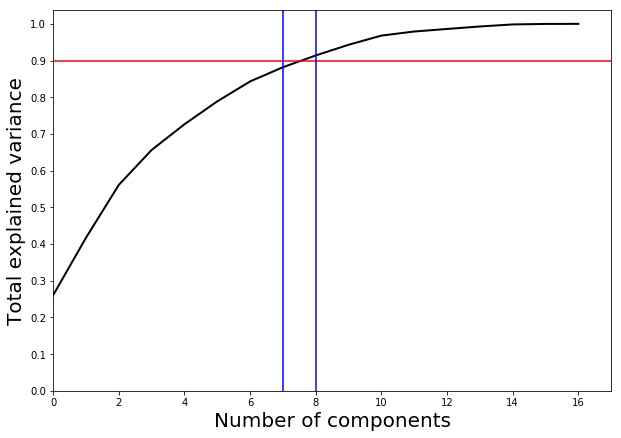

In [83]:
features = 17

events_scaled = StandardScaler().fit_transform(exdata)

pca = PCA(n_components=features, svd_solver='randomized', random_state=1)
pca.fit(events_scaled)

print('%d principal components explain %.2f%% of variance' %
      (pca.n_components_, 100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components', size=20)
plt.ylabel('Total explained variance', size=20)
plt.xlim(0, features)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')
plt.axvline(8, c='b')
plt.axvline(7, c='b')
plt.show()

In [8]:
for i in range(len(param)):
    print('%d principal components explain %.2f%% of variance' %
        (i+1, 100 * np.cumsum(pca.explained_variance_ratio_)[i]))

1 principal components explain 26.08% of variance
2 principal components explain 41.73% of variance
3 principal components explain 56.13% of variance
4 principal components explain 65.64% of variance
5 principal components explain 72.64% of variance
6 principal components explain 78.89% of variance
7 principal components explain 84.31% of variance
8 principal components explain 88.19% of variance
9 principal components explain 91.39% of variance
10 principal components explain 94.30% of variance
11 principal components explain 96.80% of variance
12 principal components explain 97.91% of variance
13 principal components explain 98.61% of variance
14 principal components explain 99.28% of variance
15 principal components explain 99.84% of variance
16 principal components explain 99.97% of variance
17 principal components explain 100.00% of variance


<font color='red'>Ответ. </font>Необходимо **9** компонент PCA, чтобы объяснить 90% дисперсии масштабированных при помощи StandardScaler данных.

Снизим размерность всего до 2 и увидим, разделяются ли события на кластеры.

Projecting 17-dimensional data to 2D


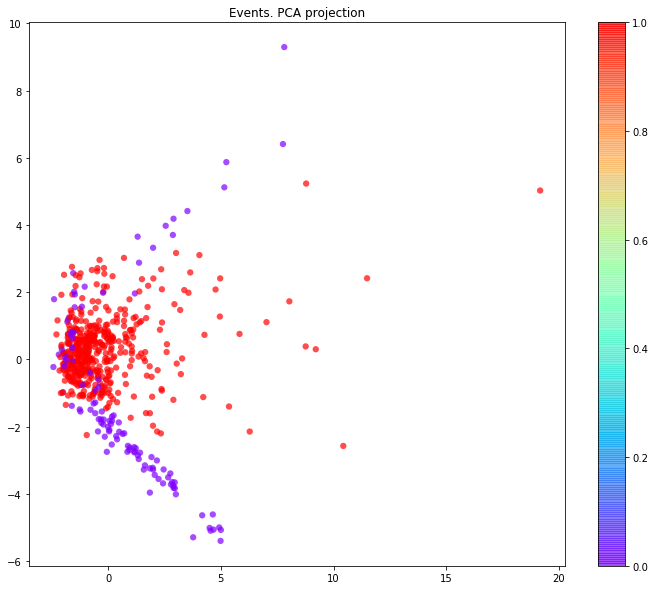

In [9]:
pca = PCA(n_components=2, svd_solver='randomized', random_state=1)
X_reduced = pca.fit_transform(events_scaled)

print('Projecting %d-dimensional data to 2D' % exdata.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=datum.EAS, 
            edgecolor='none', alpha=0.7, s=40,
            #cmap=plt.cm.get_cmap('nipy_spectral', 2)
            cmap='rainbow')
plt.colorbar()
plt.title('Events. PCA projection')

Видим, что есть область внизу слева, где кучкуются только шумовые события.

### TSNE проекция первых девяти РСА

In [11]:
from sklearn.manifold import TSNE

In [17]:
features = 9

events_scaled = StandardScaler().fit_transform(exdata)

pca = PCA(n_components=features, svd_solver='randomized', random_state=1)
X_pca = pca.fit_transform(events_scaled)


Wall time: 3.92 s


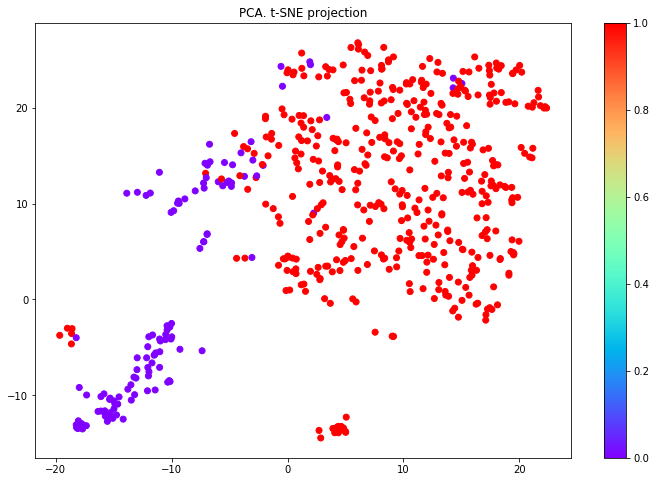

In [18]:
%%time
tsne = TSNE(n_components=2, random_state=1)
events_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(12,8))
plt.scatter(events_tsne[:, 0], events_tsne[:, 1], 
            c=datum.EAS, cmap='rainbow')
plt.colorbar();
plt.title('PCA. t-SNE projection')

In [88]:
def pca_tsne(features):
    events_scaled = StandardScaler().fit_transform(exdata)

    pca = PCA(n_components=features, svd_solver='randomized', random_state=1)
    X_pca = pca.fit_transform(events_scaled)
    
    tsne = TSNE(n_components=2, random_state=1)
    events_tsne = tsne.fit_transform(X_pca)

    plt.figure(figsize=(12,8))
    plt.scatter(events_tsne[:, 0], events_tsne[:, 1], 
                c=datum.EAS, cmap='rainbow')
    plt.colorbar();
    title = 'PCA' + str(features) + '. t-SNE projection'
    plt.title(title)

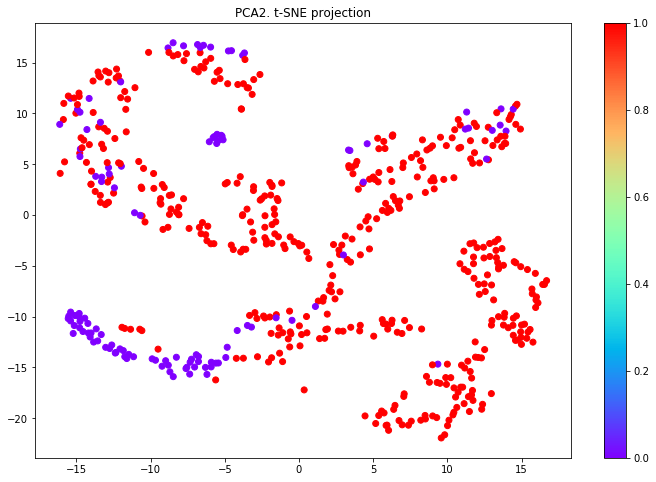

In [25]:
pca_tsne(2)

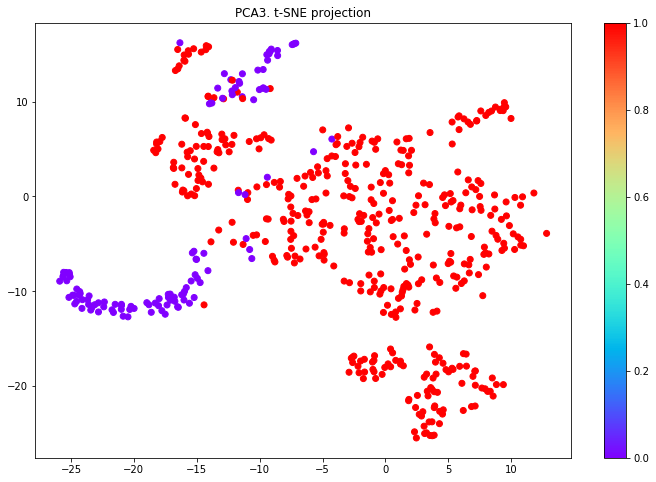

In [26]:
pca_tsne(3)

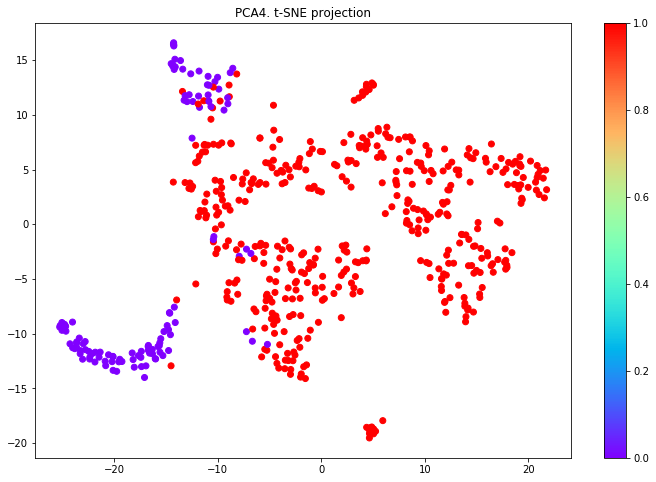

In [27]:
pca_tsne(4)

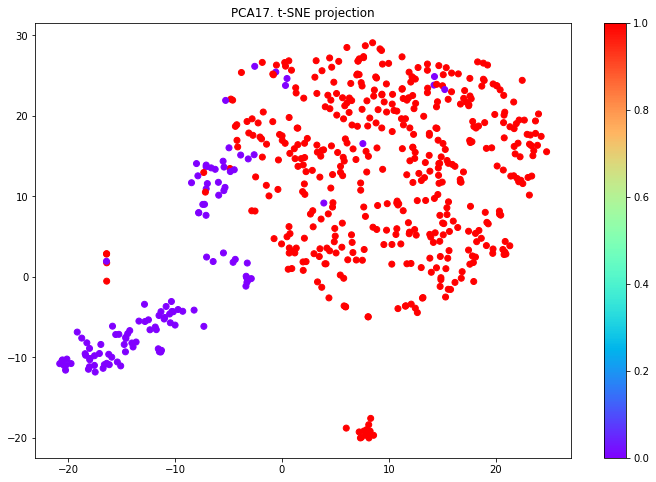

In [89]:
pca_tsne(17)

(4, 4, 1)
(4, 4, 2)
(4, 4, 3)
(4, 4, 4)
(4, 4, 5)
(4, 4, 6)
(4, 4, 7)
(4, 4, 8)
(4, 4, 9)
(4, 4, 10)
(4, 4, 11)
(4, 4, 12)
(4, 4, 13)
(4, 4, 14)
(4, 4, 15)
(4, 4, 16)


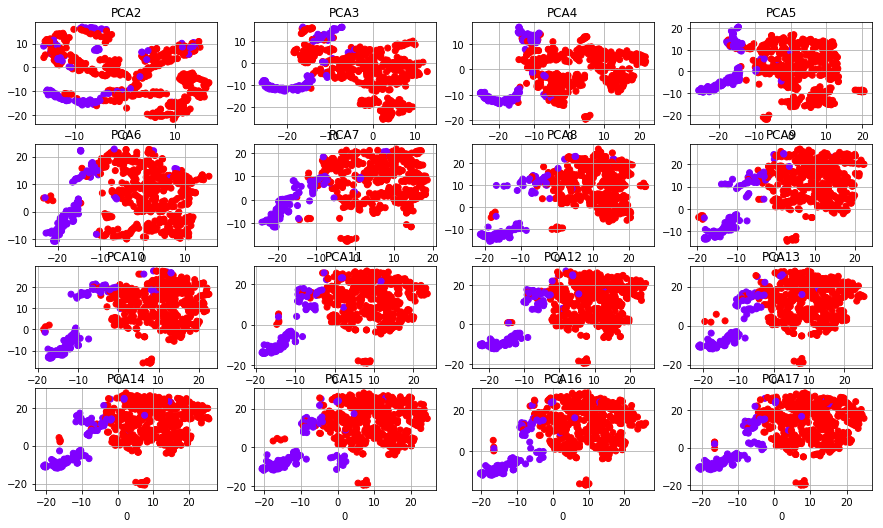

In [84]:
tsne = TSNE(n_components=2, random_state=1)
events_scaled = StandardScaler().fit_transform(exdata)

plt.figure(figsize=(15,40))

features = 18
for i in range(2,features):
    print((features//4,4,i-1))
    plt.subplot(features,4,i-1)
    #pca_tsne(i)
    
    pca = PCA(n_components=i, svd_solver='randomized', random_state=1)
    X_pca = pca.fit_transform(events_scaled)
    
    tsne = TSNE(n_components=2, random_state=1)
    events_tsne = tsne.fit_transform(X_pca)

    #plt.figure(figsize=(12,8))
    plt.scatter(events_tsne[:, 0], events_tsne[:, 1], 
                c=datum.EAS, cmap='rainbow')
    #plt.colorbar();
    title = 'PCA' + str(i)
    plt.title(title)
    plt.xlabel('0')
    #plt.grid()
    
#plt.suptitle("PCA. t-SNE projection ", size=25)
#plt.legend(loc=4)
#plt.show()

In [76]:
events_tsne

array([[ 12.3162357 ,   7.93835792],
       [ 10.85146516,   3.0358208 ],
       [-10.51743141,   4.42705792],
       ..., 
       [ 17.96911454,   8.70417034],
       [-19.18470224,   0.13880235],
       [ 15.43185285,   1.59193131]])

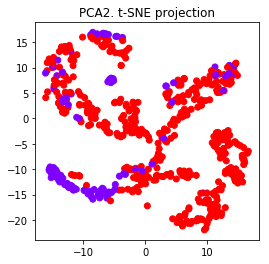

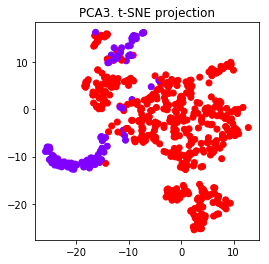

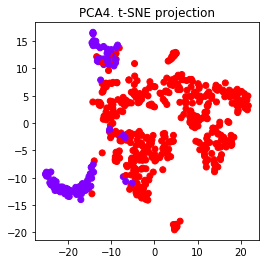

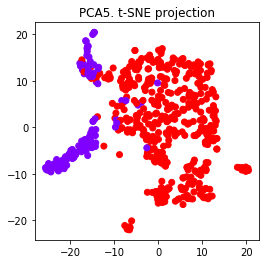

In [71]:
features = 6
for i in range(2,features):
    pca_tsne(i)

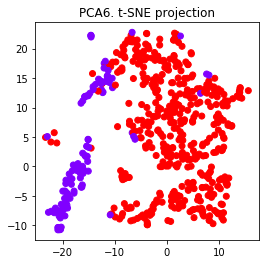

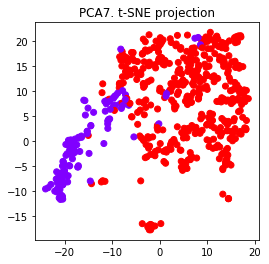

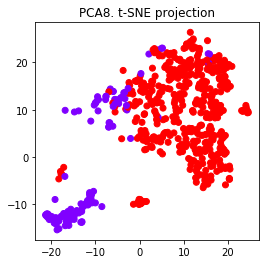

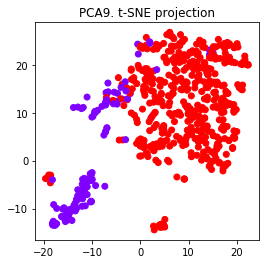

In [58]:
features = 6
for i in range(6,10):
    pca_tsne(i)

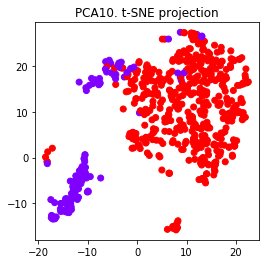

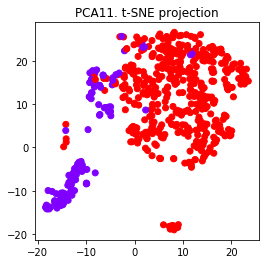

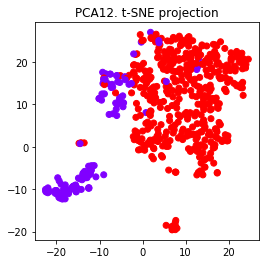

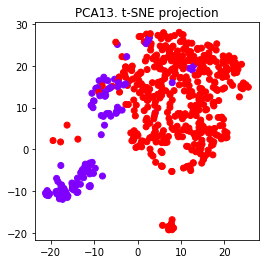

In [60]:
for i in range(10,14):
    pca_tsne(i)

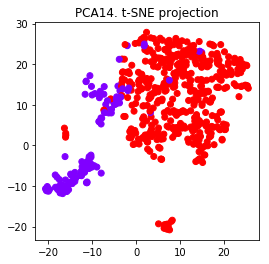

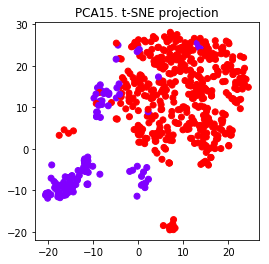

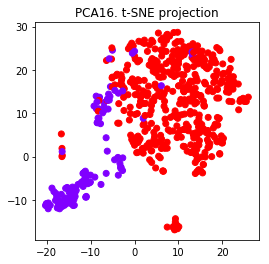

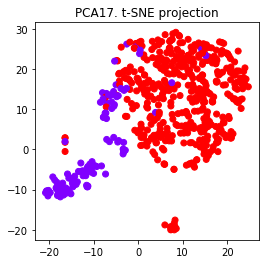

In [62]:
for i in range(14,18):
    pca_tsne(i)

18 17 1
18 17 2
18 17 3
18 17 4
18 17 5
18 17 6
18 17 7
18 17 8
18 17 9
18 17 10
18 17 11
18 17 12
18 17 13
18 17 14
18 17 15
18 17 16
18 17 17
18 17 18 0 18
18 17 19 1 18
18 17 20 2 18
18 17 21 3 18
18 17 22 4 18
18 17 23 5 18
18 17 24 6 18
18 17 25 7 18
18 17 26 8 18
18 17 27 9 18
18 17 28 10 18
18 17 29 11 18
18 17 30 12 18
18 17 31 13 18
18 17 32 14 18
18 17 33 15 18
18 17 34 16 18
18 17 35 17 18
18 17 36 18 18
18 17 37 19 18
18 17 38 20 18
18 17 39 21 18
18 17 40 22 18
18 17 41 23 18
18 17 42 24 18
18 17 43 25 18
18 17 44 26 18
18 17 45 27 18
18 17 46 28 18
18 17 47 29 18
18 17 48 30 18
18 17 49 31 18
18 17 50 32 18
18 17 51 33 18
18 17 52 34 18
18 17 53 35 18
18 17 54 36 18
18 17 55 37 18
18 17 56 38 18
18 17 57 39 18
18 17 58 40 18
18 17 59 41 18
18 17 60 42 18
18 17 61 43 18
18 17 62 44 18
18 17 63 45 18
18 17 64 46 18
18 17 65 47 18
18 17 66 48 18
18 17 67 49 18
18 17 68 50 18
18 17 69 51 18
18 17 70 52 18
18 17 71 53 18
18 17 72 54 18
18 17 73 55 18
18 17 74 56 18
18 17 75 57

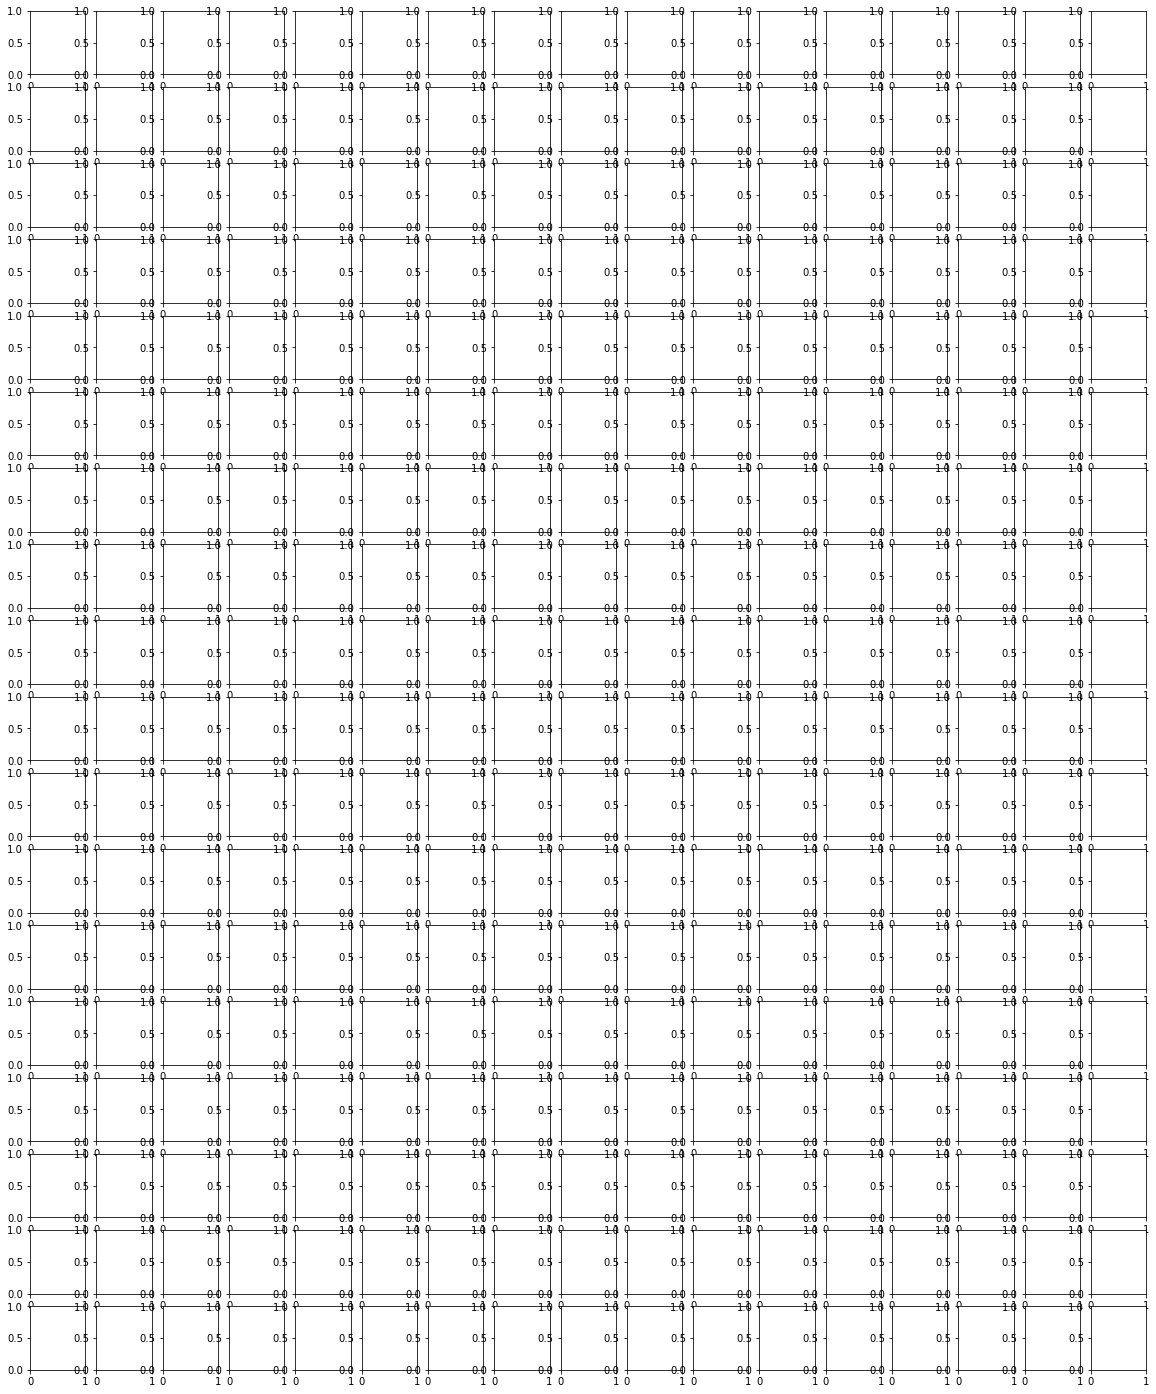

In [65]:

param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s',       
       'TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n', 'Crit1', 'Crit2',
       'Dt', 'Atotal','delay','DtH'] 
duo = [[i,j] for j in range(len(param)-1) for i in range(len(param)-1)]
features = param [1:]

plt.figure(figsize=(20,25))

for i in range(len(param)-1):
    plt.subplot(len(param),len(param)-1,1+i)
    print(len(param),len(param)-1,1+i)
    
for pairidx, pair in enumerate(duo):   
    plt.subplot(len(param),len(param)-1, pairidx + len(param))
    print(len(param),len(param)-1, pairidx + len(param), pairidx, len(param))
